## Problem1

A University would like to effectively classify their students based on the program they are enrolled in. Perform multinomial regression on the given dataset and provide insights (in the documentation).
a.	prog: is a categorical variable indicating what type of program a student is in: “General” (1), “Academic” (2), or “Vocational” (3).
b.	Ses: is a categorical variable indicating someone’s socioeconomic status: “Low” (1), “Middle” (2), and “High” (3).
c.	read, write, math, and science are their scores on different tests.
d.	honors: Whether they are an honor roll or not.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('mdata.csv',encoding = "ISO-8859-1")

In [4]:
df.head()

,Unnamed: 0,id,female,ses,schtyp,prog,read,write,math,science,honors
0,1,45,female,low,public,vocation,34,35,41,29,not enrolled
1,2,108,male,middle,public,general,34,33,41,36,not enrolled
2,3,15,male,high,public,vocation,39,39,44,26,not enrolled
3,4,67,male,low,public,vocation,37,37,42,33,not enrolled
4,5,153,male,middle,public,vocation,39,31,40,39,not enrolled


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.drop('id',axis=1,inplace=True)

In [9]:
df.shape

(200, 9)

In [10]:
df.columns

Index(['female', 'ses', 'schtyp', 'prog', 'read', 'write', 'math', 'science',
       'honors'],
      dtype='object')

In [11]:
df.dtypes

female     object
ses        object
schtyp     object
prog       object
read        int64
write       int64
math        int64
science     int64
honors     object
dtype: object

In [12]:
df.describe(exclude = ["number"])

,female,ses,schtyp,prog,honors
count,200,200,200,200,200
unique,2,3,2,3,2
top,female,middle,public,academic,not enrolled
freq,109,95,168,105,147


In [13]:
df.select_dtypes(include=["object"])

,female,ses,schtyp,prog,honors
0,female,low,public,vocation,not enrolled
1,male,middle,public,general,not enrolled
2,male,high,public,vocation,not enrolled
3,male,low,public,vocation,not enrolled
4,male,middle,public,vocation,not enrolled
...,...,...,...,...,...
195,female,high,public,academic,enrolled
196,male,middle,public,vocation,enrolled
197,male,middle,public,academic,enrolled
198,female,middle,public,academic,enrolled


In [14]:
from sklearn.preprocessing import LabelEncoder
# define one hot encoding
encoder = LabelEncoder()
# transform data
df['female']= encoder.fit_transform(df.female)
df['schtyp']= encoder.fit_transform(df.schtyp)
df['prog']= encoder.fit_transform(df.prog)
df['honors']= encoder.fit_transform(df.honors)

In [15]:
df['ses'] = df['ses'].replace(['low','middle','high'],[0,1,2])

In [16]:
df.head()

,female,ses,schtyp,prog,read,write,math,science,honors
0,0,0,1,2,34,35,41,29,1
1,1,1,1,1,34,33,41,36,1
2,1,2,1,2,39,39,44,26,1
3,1,0,1,2,37,37,42,33,1
4,1,1,1,2,39,31,40,39,1


In [17]:
df.dtypes

female     int32
ses        int64
schtyp     int32
prog       int32
read       int64
write      int64
math       int64
science    int64
honors     int32
dtype: object

In [18]:
df[df.duplicated()]

,female,ses,schtyp,prog,read,write,math,science,honors


<AxesSubplot:>

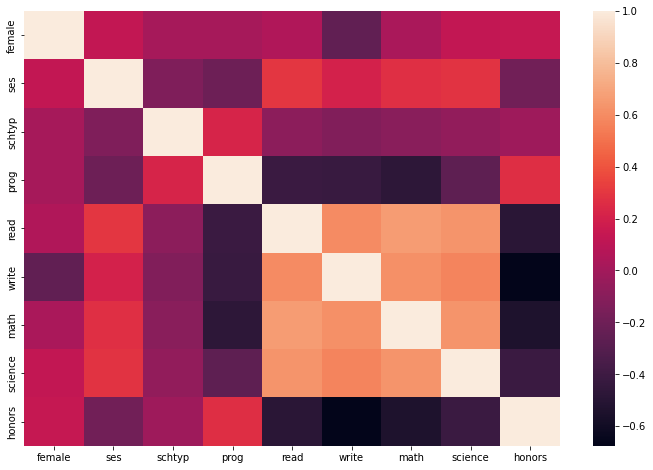

In [19]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.heatmap(df.corr(), annot=False)

Radio and radio cassette are highly correlated. 
central lock and power windows are highly correlated. 

In [50]:
# Sctter plot and histogram between variables
#sns.pairplot(df) # no multicolinearity issue

## Train Test split

In [20]:
X=df[df.columns.drop('prog')] ## independent features
y=df['prog'] ## dependent features

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
X_train.shape

(160, 8)

In [23]:
X_test.shape

(40, 8)

In [24]:
y_test.shape

(40,)

## Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)

In [26]:
X_train_scaled .shape

(160, 8)

## Multinomial Regression


In [43]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.619 (0.089)


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial')

# define the model evaluation procedure
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

parameters={'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
           'penalty':['l2'],
           'C': [0.005, 0.02, 0.05, 0.5, 1.0]}
classifier=GridSearchCV(model,parameters,cv=rskf,scoring='accuracy')
classifier.fit(X_train_scaled,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.005, 0.02, 0.05, 0.5, 1.0], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring='accuracy')

In [53]:
print('best param = ',classifier.best_params_)
print('best accuracy = ',classifier.best_score_)

best param =  {'C': 0.5, 'penalty': 'l2', 'solver': 'newton-cg'}
best accuracy =  0.61875


In [54]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='l2', C=0.5)
X_test_scaled = scaler.fit_transform(X_test)
results = model.fit(X_test_scaled,y_test)
# predicting the test set results
y_pred = model.predict(X_test_scaled)
score  = accuracy_score(y_test,y_pred)
print('test accuracy = ' ,score)

test accuracy =  0.55


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[16  2  2]
 [ 6  2  3]
 [ 3  2  4]]


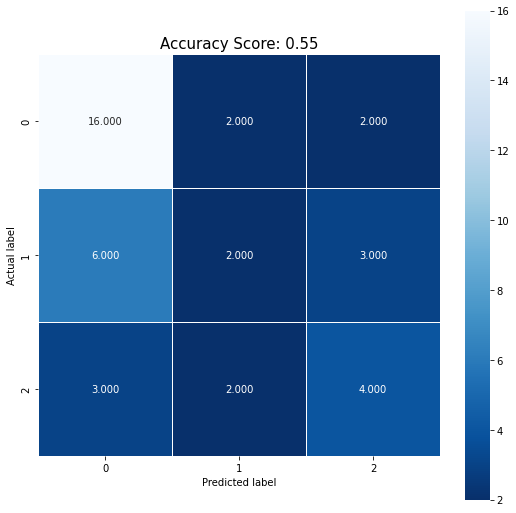

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);